In [1]:
import matplotlib.pyplot as plt
from glob import glob

In [2]:
folder_path = './experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820'

glob(folder_path+'*.png')

[]

Image Similarity: 94.6036%
Image Similarity: 95.2404%
Image Similarity: 95.4765%
Image Similarity: 95.6373%
Image Similarity: 95.7311%
Image Similarity: 95.8155%
Image Similarity: 95.8528%


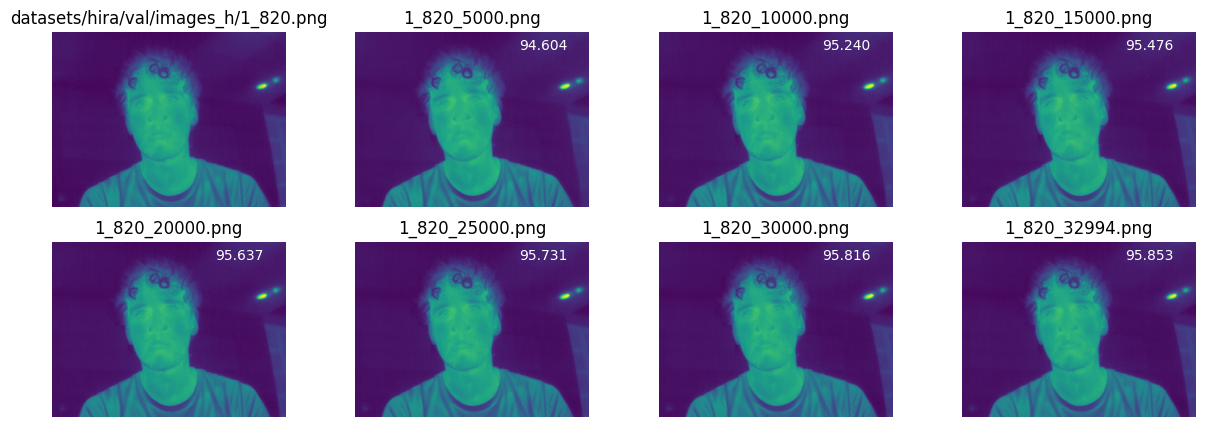

In [3]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from natsort import natsorted
from skimage.metrics import structural_similarity


def visualize_gallery(folder_path):
    image_files = natsorted([file for file in os.listdir(folder_path) if file.endswith('.png')])
    gt = 'datasets/hira/val/images_h/1_820.png'
    # image_files = sorted(glob(folder_path+'*.png'))

    fig, axes = plt.subplots(2, len(image_files)//2 + 1, figsize=(15, 5))

    # gt
    ax0 = axes.flatten()[0]
    ax0.imshow(img_gt:=plt.imread(gt))
    ax0.set_title(gt)
    ax0.axis('off')

    imgs = []
    for ax, image_file in zip(axes.flatten()[1:], image_files):
        img_path = os.path.join(folder_path, image_file)
        imgs.append(img:= plt.imread(img_path))
        # print(img.shape)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(image_file)
        (score, diff) = structural_similarity(img_gt, img, full=True, channel_axis=-1, data_range=1)
        ax.text(0.7, 0.9, f'{score*100:.3f}', c = 'white', transform=ax.transAxes)
        print("Image Similarity: {:.4f}%".format(score * 100))

    # custom_norm = Normalize(vmin=0.001, vmax=1.0, clip=False)
    # plt.tight_layout()
    plt.show()

    return imgs

folder_path = './experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/'
imgs = visualize_gallery(folder_path)


In [4]:
image_files = natsorted(glob('experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/*.png'))
image_files

['experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_5000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_10000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_15000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_20000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_25000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_30000.png',
 'experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/1_820_32994.png']

In [75]:
import cv2

def get_img_diff(before_path, after_path):
    contours, diff, diff_box, mask, filled_after = None, None, None, None, None
    before = cv2.imread(before_path)
    after = cv2.imread(after_path)
    # Convert images to grayscale
    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

    # Compute SSIM between the two images
    (score, diff) = structural_similarity(before_gray, after_gray, full=True)
    # print("Image Similarity: {:.4f}%".format(score * 100))

    # The diff image contains the actual image differences between the two images
    # and is represented as a floating point data type in the range [0,1]
    # so we must convert the array to 8-bit unsigned integers in the range
    # [0,255] before we can use it with OpenCV
    diff = (diff * 255).astype("uint8")
    diff_box = cv2.merge([diff, diff, diff])

    # Threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    mask = np.zeros(before.shape, dtype='uint8')
    filled_after = after.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area > 40:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [c], 0, (255,255,255), -1)
            cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

    return score, diff, diff_box, mask, filled_after

Image Similarity: 95.5013%
Image Similarity: 95.9116%
Image Similarity: 96.0664%
Image Similarity: 96.1728%
Image Similarity: 96.2375%
Image Similarity: 96.3091%
Image Similarity: 96.3320%


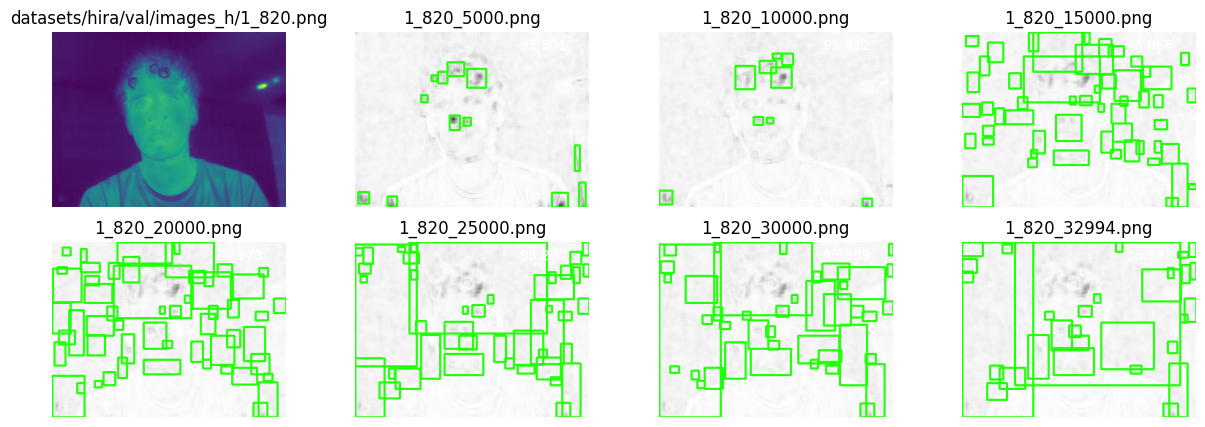

In [76]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from natsort import natsorted
from skimage.metrics import structural_similarity
import cv2

def visualize_gallery_diff(folder_path):
    image_files = natsorted([file for file in os.listdir(folder_path) if file.endswith('.png')])
    gt = 'datasets/hira/val/images_h/1_820.png'

    fig, axes = plt.subplots(2, len(image_files)//2 + 1, figsize=(15, 5))
    # gt
    ax0 = axes.flatten()[0]
    ax0.imshow(plt.imread(gt))
    ax0.set_title(gt)
    ax0.axis('off')
    imgs = []
    for ax, image_file in zip(axes.flatten()[1:], image_files):
        img_path = os.path.join(folder_path, image_file)
        gt = 'datasets/hira/val/images_h/1_820.png'


        score, diff, diff_box, mask, filled_after = get_img_diff(gt, img_path)
        ax.imshow(diff_box)
        ax.axis('off')
        ax.set_title(image_file)
        ax.text(0.7, 0.9, f'{score*100:.3f}', c = 'white', transform=ax.transAxes)
        print("Image Similarity: {:.4f}%".format(score * 100))

    # plt.tight_layout()
    plt.show()

    return imgs

folder_path = './experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/'
imgs = visualize_gallery_diff(folder_path)


Image Similarity: 96.2077%


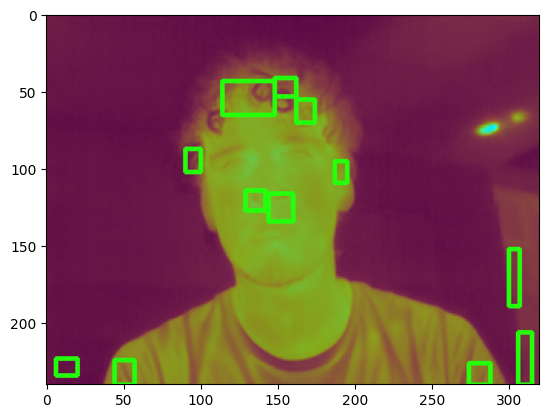

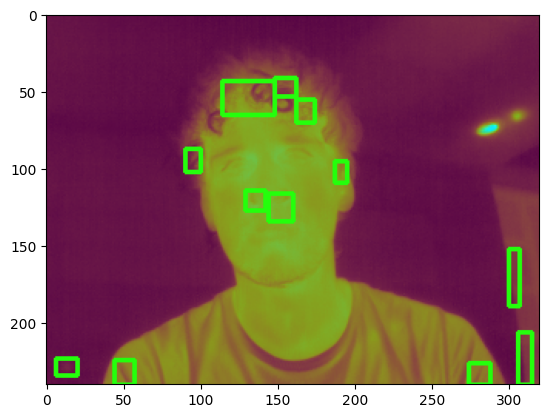

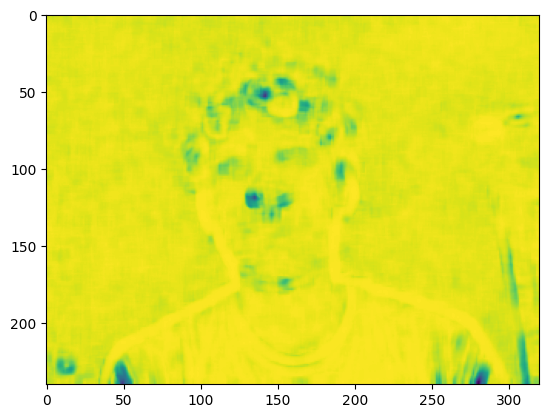

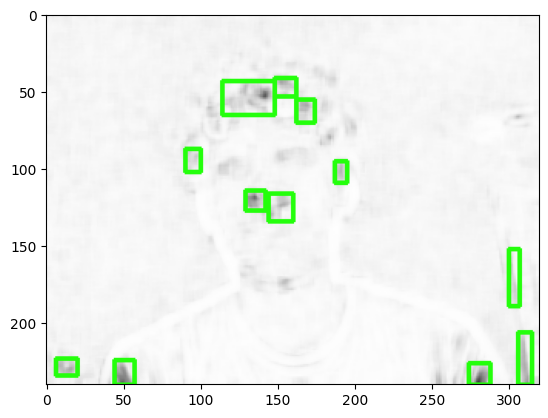

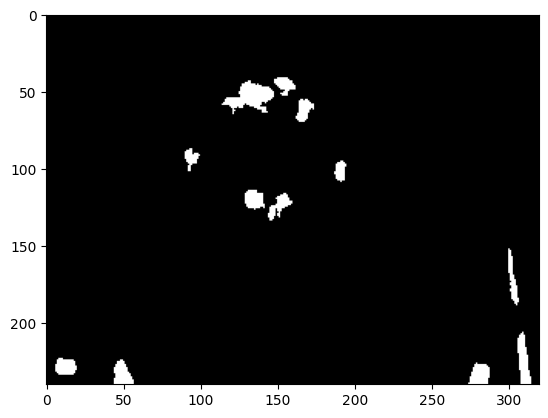

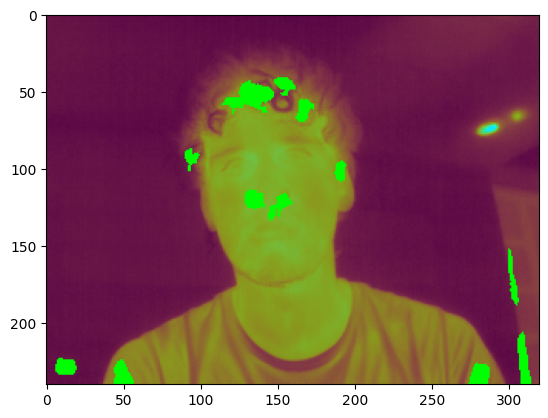

In [63]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

image_files = natsorted(glob('experiments/finetune_RealESRGANx4plus_400k_pairdata/visualization/1_820/*.png'))

# Load images
before = cv2.imread(image_files[0])
after = cv2.imread(image_files[-2])


# Convert images to grayscale
before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1]
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

plt.imshow(before)
plt.show()
plt.imshow(after)
plt.show()
plt.imshow(diff)
plt.show()
plt.imshow(diff_box)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(filled_after)
plt.show()
# cv2.imshow('before', before)
# cv2.imshow('after', after)
# cv2.imshow('diff', diff)
# cv2.imshow('diff_box', diff_box)
# cv2.imshow('mask', mask)
# cv2.imshow('filled after', filled_after)
# cv2.waitKey()